In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge

## Data Collection and Processing

In [66]:
df=pd.read_csv('car data.csv')

In [67]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [68]:
df.shape

(301, 9)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [70]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [71]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [72]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [73]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

## Encoding the Categorical Data

In [74]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8248\1263251761.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8248\1263251761.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8248\1263251761.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

In [75]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [76]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [77]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [78]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [80]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Model evaluation

In [81]:
training_data_prediction = lin_reg_model.predict(X_test)

In [82]:
training_data_prediction

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [83]:

error_score = metrics.r2_score(Y_test, training_data_prediction)


In [84]:
error_score

0.8365766715026374

In [85]:
##What it tells you:
# R² Value	Interpretation
# ~0.83	👍 Good — most of the variance is explained
# > 0.9	💯 Excellent model (for clean data)
# < 0.6	⚠️ Needs improvement

In [86]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
r_score=metrics.r2_score(Y_test, rf_pred)

In [87]:
r_score

0.9805517643053386

In [88]:
ensemble_pred = (training_data_prediction + rf_pred) / 2

In [89]:
final_score=metrics.r2_score(Y_test, ensemble_pred)

In [90]:
final_score

0.946894379344722

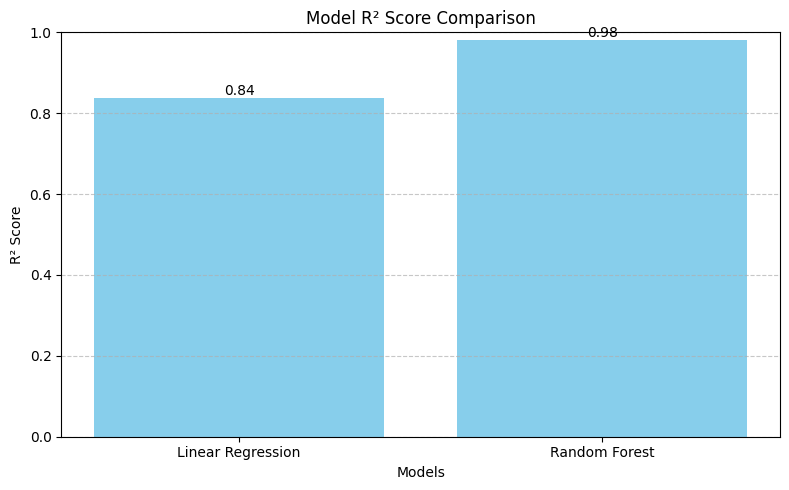

In [91]:


# Model names and scores
model_names = ['Linear Regression','Random Forest']
r2_scores = [error_score, r_score]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, r2_scores, color='skyblue')
plt.ylim(0, 1)
plt.title("Model R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Models")

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [92]:
import joblib

joblib.dump(rf_model, "random_forest_model.pkl")



['random_forest_model.pkl']